# Assignment 4 - fit 5149

In [78]:
set.seed(1234)

The dataset obtained from a prostate cancer lab containing 3000 observations with 10 numerical features. The cancer is classified into categories tha are related to the level of treatability.

- 0 for curable
- 1 for tumour stage 
- 2 for node stage
- 3 for incurable cancers.

Our task is to classifier using machine learning methods that will help predict the stage of a pateients caner given 10 variables that are provided to us.



In [79]:
library(reshape2)
library(ggplot2)
library(caret)
library(randomForest)
library(e1071)
library(ISLR)
require(boot)
library(MASS)
library(pROC)
library(nnet)
library(class)
library(kernlab)
library(ggplot2)
library(kknn)
library(devtools)

#plot.nn
source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')

SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d


In [80]:
options(warn=-1)

In [81]:
# reading the data
data <- read.csv('data3000Final.csv', sep=',')

In [82]:
head(data)

ID,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,Result
1,1,4,1,4,3,7,1,2,6,8,0
2,?,8,9,1,1,1,1,5,6,1,1
3,10,7,?,7,?,5,2,7,1,1,2
4,3,4,3,?,2,8,4,6,7,2,1
5,3,5,2,1,6,5,3,1,7,1,0
6,2,7,3,2,1,4,10,3,9,5,1


In [83]:
sum(data=='?')

[1] 4

We have missing values in our data in a form of a question mark. There are 4 missing values which we will impute using linear regression. For modelling puposes th 'ID' column is left out as it will not provide usefull information.

In [84]:
# remove ID 
actual = data[,-1]

In [85]:
imp_data <- actual[-c(2:4),]

In [86]:
folds1 <- cut(seq(1,nrow(imp_data)),breaks=10,labels=FALSE)

We remove the rows that contain missing values. Convert all columns to numeric and then fit our models.

In [87]:
imp_data$ATT1 <- as.numeric(as.character(imp_data$ATT1))
imp_data$ATT3 <- as.numeric(as.character(imp_data$ATT3))
imp_data$ATT4 <- as.numeric(as.character(imp_data$ATT4))
imp_data$ATT5 <- as.numeric(as.character(imp_data$ATT5))

### ATT1

In [88]:
error.lm1 <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds1==i,arr.ind=TRUE)
    test.data <- imp_data[testIndexes, -1]
    test.labels <- imp_data[testIndexes, 1]
    train.data <- imp_data[-testIndexes, ]
    

    lm.fit1 <- lm(ATT1~ ., train.data)
    prediction <- predict(lm.fit1, test.data)
    error.lm1[i] <- sqrt((prediction - test.labels)^2)
}
round(mean(error.lm1),3)

[1] 2.033

In [89]:
fit1 <- lm(ATT1~as.factor(Result) + ATT2 + ATT3 +ATT4 + ATT5 + ATT6 +ATT7 +ATT8 + ATT9 + ATT10, imp_data)
fit3 <- lm(ATT3~as.factor(Result) + ATT2 + ATT1 +ATT4  + ATT6 +ATT7 +ATT8 + ATT9 + ATT10, imp_data[,-5])
fit4 <- lm(ATT4~as.factor(Result) + ATT2 + ATT3 +ATT1 + ATT5 + ATT6 +ATT7 +ATT8 + ATT9 + ATT10, imp_data)
fit5 <- lm(ATT5~as.factor(Result) + ATT2 + ATT1 +ATT4 + ATT6 +ATT7 +ATT8 + ATT9 + ATT10, imp_data[,-3])

In [90]:
summary(fit1)


Call:
lm(formula = ATT1 ~ as.factor(Result) + ATT2 + ATT3 + ATT4 + 
    ATT5 + ATT6 + ATT7 + ATT8 + ATT9 + ATT10, data = imp_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3573 -1.6217 -0.0649  1.5207  6.7581 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        11.27158    0.29398   38.34   <2e-16 ***
as.factor(Result)1  3.99406    0.13909   28.71   <2e-16 ***
as.factor(Result)2  7.25325    0.21019   34.51   <2e-16 ***
as.factor(Result)3 10.63073    0.31704   33.53   <2e-16 ***
ATT2               -0.27163    0.01725  -15.75   <2e-16 ***
ATT3               -0.24996    0.01761  -14.19   <2e-16 ***
ATT4               -0.26980    0.01765  -15.29   <2e-16 ***
ATT5               -0.28591    0.01779  -16.07   <2e-16 ***
ATT6               -0.25482    0.01740  -14.64   <2e-16 ***
ATT7               -0.24053    0.01722  -13.96   <2e-16 ***
ATT8               -0.26905    0.01742  -15.45   <2e-16 ***
ATT9               -0.26198    0.01762 

In [91]:
test1 <- actual[2,-1]
test1$ATT3 <- as.numeric(test1$ATT3)
test1$ATT4 <- as.numeric(test1$ATT4)
test1$ATT5 <- as.numeric(test1$ATT5)
round(predict(fit1, test1))
actual[2,1] <- round(predict(fit1, test1))

2 
6

### ATT3

In [92]:
error.lm2 <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds1==i,arr.ind=TRUE)
    test.data <- imp_data[testIndexes, -3]
    test.labels <- imp_data[testIndexes, 3]
    train.data <- imp_data[-testIndexes, ]
    

    lm.fit2 <- lm(ATT3~ ., train.data[,-5])
    prediction <- predict(lm.fit2, test.data)
    error.lm2[i] <- sqrt((prediction - test.labels)^2)
}
round(mean(error.lm2),3)

[1] 2.561

In [93]:
summary(fit3)


Call:
lm(formula = ATT3 ~ as.factor(Result) + ATT2 + ATT1 + ATT4 + 
    ATT6 + ATT7 + ATT8 + ATT9 + ATT10, data = imp_data[, -5])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8806 -1.7552 -0.1895  1.7026  6.9689 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         8.91979    0.26254   33.98   <2e-16 ***
as.factor(Result)1  3.12635    0.13417   23.30   <2e-16 ***
as.factor(Result)2  5.65988    0.19528   28.98   <2e-16 ***
as.factor(Result)3  8.31006    0.29519   28.15   <2e-16 ***
ATT2               -0.19203    0.01758  -10.93   <2e-16 ***
ATT1               -0.19247    0.01795  -10.72   <2e-16 ***
ATT4               -0.22431    0.01803  -12.44   <2e-16 ***
ATT6               -0.21004    0.01772  -11.86   <2e-16 ***
ATT7               -0.21950    0.01751  -12.54   <2e-16 ***
ATT8               -0.22333    0.01762  -12.68   <2e-16 ***
ATT9               -0.20584    0.01810  -11.37   <2e-16 ***
ATT10              -0.18760    0.01812  

In [94]:
test2 <- actual[3,-c(3,5)]
test2$ATT1 <- as.numeric(test2$ATT1)
test2$ATT4 <- as.numeric(test2$ATT4)
round(predict(fit3, test2))
actual[3,3] <- round(predict(fit3, test2))

3 
7

### ATT5

In [95]:
error.lm5 <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds1==i,arr.ind=TRUE)
    test.data <- imp_data[testIndexes, -5]
    test.labels <- imp_data[testIndexes, 5]
    train.data <- imp_data[-testIndexes, ]
    

    lm.fit5 <- lm(ATT5~ ., train.data[,-3])
    prediction <- predict(lm.fit5, test.data)
    error.lm5[i] <- sqrt((prediction - test.labels)^2)
}
round(mean(error.lm5),3)

[1] 1.452

In [96]:
test5 <- actual[3,-c(3,5)]
test5$ATT1 <- as.numeric(test5$ATT1)
test5$ATT4 <- as.numeric(test5$ATT4)
round(predict(fit5, test5))
actual[3,5] <- round(predict(fit5, test5))

3 
7

### ATT4

In [97]:
error.lm4 <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds1==i,arr.ind=TRUE)
    test.data <- imp_data[testIndexes, -4]
    test.labels <- imp_data[testIndexes, 4]
    train.data <- imp_data[-testIndexes, ]
    

    lm.fit4 <- lm(ATT4~ ., train.data[])
    prediction <- predict(lm.fit4, test.data)
    error.lm4[i] <- sqrt((prediction - test.labels)^2)
}
round(mean(error.lm4),3)

[1] 1.485

In [98]:
test4 <- actual[4,-c(4)]
test4$ATT1 <- as.numeric(test4$ATT1)
test4$ATT3 <- as.numeric(test4$ATT3)
test4$ATT5 <- as.numeric(test4$ATT5)
round(predict(fit4, test4))
actual[4,4] <- round(predict(fit4, test4))

4 
3

In [99]:
actual$ATT1 <- as.integer(as.character(actual$ATT1))
actual$ATT3 <- as.integer(as.character(actual$ATT3))
actual$ATT4 <- as.integer(as.character(actual$ATT4))
actual$ATT5 <- as.integer(as.character(actual$ATT5))

In [100]:
str(actual)

'data.frame':	3000 obs. of  11 variables:
 $ ATT1  : int  1 6 10 3 3 2 1 8 2 1 ...
 $ ATT2  : int  4 8 7 4 5 7 1 5 9 1 ...
 $ ATT3  : int  1 9 7 3 2 3 3 2 2 1 ...
 $ ATT4  : int  4 1 7 3 1 2 5 6 1 8 ...
 $ ATT5  : int  3 1 7 2 6 1 9 2 4 9 ...
 $ ATT6  : int  7 1 5 8 5 4 3 7 6 2 ...
 $ ATT7  : int  1 1 2 4 3 10 7 3 8 2 ...
 $ ATT8  : int  2 5 7 6 1 3 1 6 8 5 ...
 $ ATT9  : int  6 6 1 7 7 9 10 7 4 1 ...
 $ ATT10 : int  8 1 1 2 1 5 7 3 3 3 ...
 $ Result: int  0 1 2 1 0 1 1 1 1 0 ...


Now that we have imputed the values we can covert the values to INT as specified in the provided information. We are able to explore the data.

In [101]:
summary(actual)

      ATT1             ATT2             ATT3             ATT4      
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.00  
 Median : 4.000   Median : 4.000   Median : 4.000   Median : 4.00  
 Mean   : 4.425   Mean   : 4.501   Mean   : 4.423   Mean   : 4.44  
 3rd Qu.: 7.000   3rd Qu.: 7.000   3rd Qu.: 7.000   3rd Qu.: 6.00  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.00  
      ATT5             ATT6             ATT7             ATT8       
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.000  
 Median : 4.000   Median : 4.000   Median : 4.000   Median : 4.000  
 Mean   : 4.327   Mean   : 4.431   Mean   : 4.479   Mean   : 4.478  
 3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 7.000   3rd Qu.: 7.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
      ATT9            ATT10            Re

In [102]:
cor(actual)

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,Result
ATT1,1.00000000,0.04694765,0.08155245,0.05644193,0.04475873,0.05411429,0.07030713,0.05078616,0.05318463,0.05363708,0.3746451
ATT2,0.04694765,1.00000000,0.06805979,0.06129739,0.03148968,0.03876773,0.01040558,0.03005082,0.09395665,0.07175823,0.3513808
ATT3,0.08155245,0.06805979,1.00000000,0.04619093,0.06467429,0.03924833,0.03043947,0.02630970,0.05997912,0.08434563,0.3652911
ATT4,0.05644193,0.06129739,0.04619093,1.00000000,0.08095189,0.04579681,0.05883525,0.02134851,0.02716573,0.08285518,0.3604520
ATT5,0.04475873,0.03148968,0.06467429,0.08095189,1.00000000,0.05011721,0.07164752,0.02912100,0.08269825,0.08387365,0.3743544
ATT6,0.05411429,0.03876773,0.03924833,0.04579681,0.05011721,1.00000000,0.02353072,0.04098002,0.06730040,0.06278645,0.3336554
ATT7,0.07030713,0.01040558,0.03043947,0.05883525,0.07164752,0.02353072,1.00000000,0.07779032,0.03726685,0.06749372,0.3400584
ATT8,0.05078616,0.03005082,0.02630970,0.02134851,0.02912100,0.04098002,0.07779032,1.00000000,0.04297858,0.03309635,0.3273196
ATT9,0.05318463,0.09395665,0.05997912,0.02716573,0.08269825,0.06730040,0.03726685,0.04297858,1.00000000,0.01185232,0.3488814
ATT10,0.05363708,0.07175823,0.08434563,0.08285518,0.08387365,0.06278645,0.06749372,0.03309635,0.01185232,1.00000000,0.3722676


The variables are very uncorrelated. 

Using  as id variables


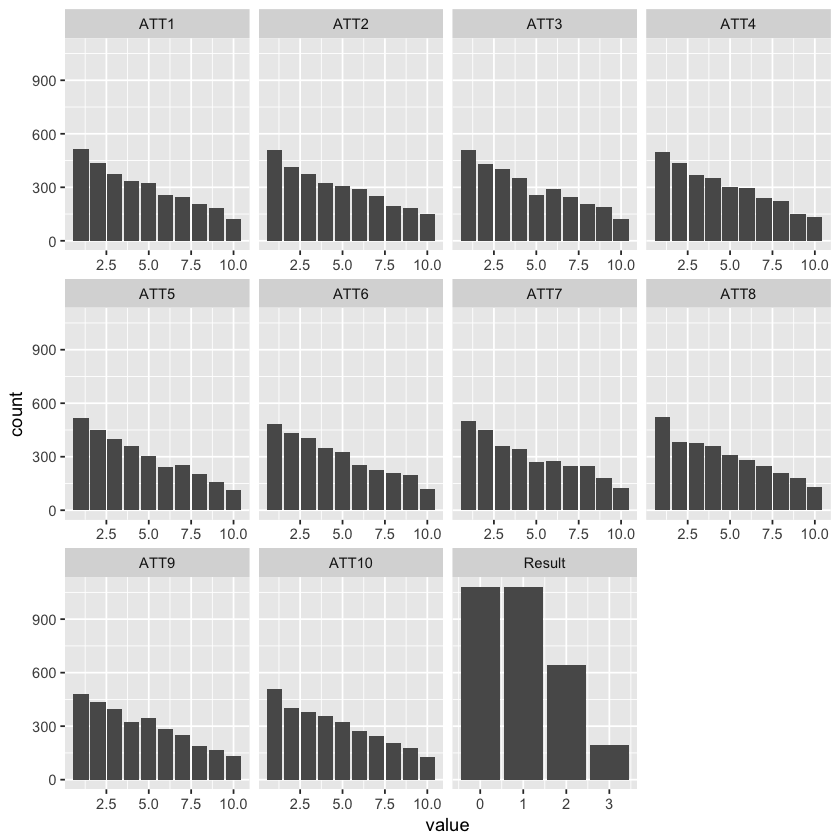

In [103]:
d <- melt(actual)
ggplot(d,aes(x = value)) + 
    facet_wrap(~variable,scales = "free_x") + 
    geom_bar()

The value are lower as they get higher. 

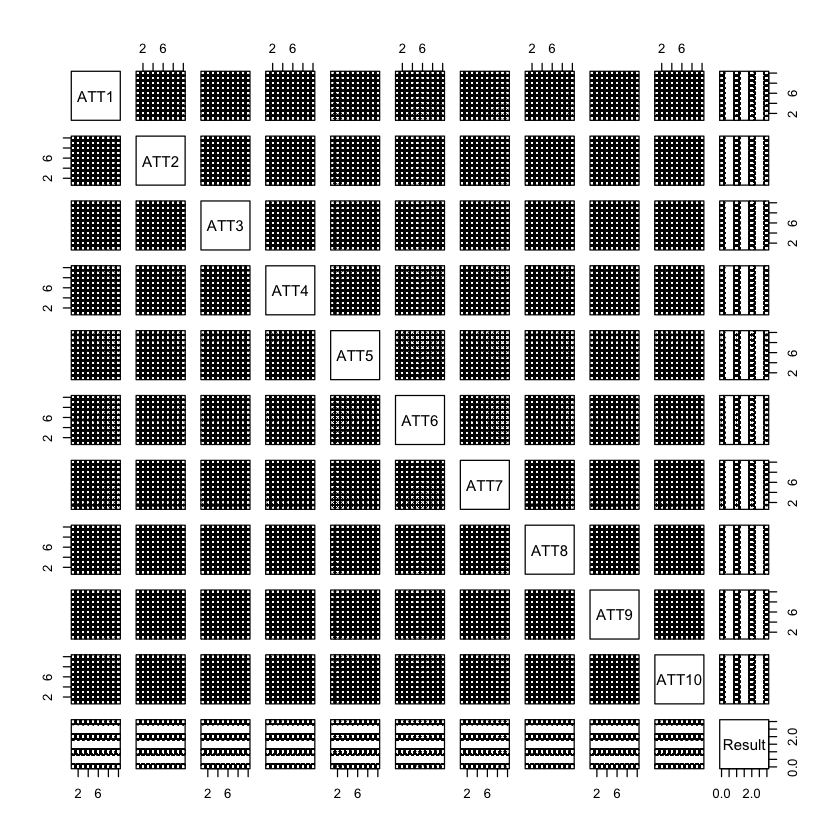

In [104]:
pairs(actual)

In [105]:
table(actual$Result)


   0    1    2    3 
1082 1080  642  196 

The severtiy of Cancer and variables and frequency have a negative relationship. This could be due to the rarity of severe cases and/or due to the high mortality rate for severe cases.

# Models 
This is a classification problem. Models we will try are.
 - Random Forests and Trees
 - QDA and LDA
 - SVM
 - kNN
 - Naive Bayes
 

# Evaluation

To evaluate our methods we will use the misclassification rate. The number of predictions that are not correct. AUC is not a viable method for 3 variables. There is a 3 variable version of AUC called Volume Under Curve but it has no stable packages in R, but it is an area to explore. 

In some classification problems where the labels are ordinal like in this case. Stage 3 prediction of a Stage 4 Cancer might be a less wrong than classifying it as a Stage 1, we will ignore partial correcteness and treat all labels are factors. There is also possiblity of penalising forecasts that hurt the patients more. Like a stage 1 cancer patient getting classiefied as stage 3 and receiving radiation treatement that was not needed. 

We will use 10-fold cross valiation to measure the missclassification error. 

### prepartion

In [106]:
model.err <- matrix(0, nrow=10, ncol=2)

In [107]:
actual2 <- actual[sample(nrow(actual)),]

In [108]:
folds <- cut(seq(1,nrow(actual)),breaks=10,labels=FALSE)

# Random Forest 

Single tree method performed very badly and therefore were not included

In [109]:
error.rf <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds==i,arr.ind=TRUE)
    test.data <- actual[testIndexes, -ncol(actual)]
    test.labels <- actual[testIndexes, ncol(actual)]
    train.data <- actual[-testIndexes, ]
    

    rf.fit <- randomForest(as.factor(Result)~. , train.data)
    prediction <- predict(rf.fit, test.data)
    error.rf[i] <- mean(prediction!=test.labels)
}
round(mean(error.rf),3)

[1] 0.223

Random Forests take a while to run.

In [110]:
model.err[1,1] <- 'Random Forest'
model.err[1,2] <- round(mean(error.rf),3)

# Naive Bayes

In [111]:
error.nb <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds==i,arr.ind=TRUE)
    test.data <- actual[testIndexes, -ncol(actual)]
    test.labels <- actual[testIndexes, ncol(actual)]
    train.data <- actual[-testIndexes, ]
    
    
    nb.fit <- naiveBayes(as.factor(Result) ~ ., data = train.data)
    prediction <- predict(nb.fit, test.data)
    error.nb[i] <- mean(prediction!=test.labels)
}
print(mean(error.nb))

[1] 0.217


In [112]:
model.err[2,1] <- 'Naive Bayes'
model.err[2,2] <- round(mean(error.nb),3)

# Support Vector Machines 

We use the e1071 and kernlab packages for this 

In [36]:
tune.out <- tune(svm, as.factor(Result)~., data = actual, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(tune.out)
tune.out$best.parameters


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.0003333333 

- Detailed performance results:
   cost        error  dispersion
1 1e-02 0.0653333333 0.029067822
2 1e-01 0.0220000000 0.012392750
3 1e+00 0.0080000000 0.006324555
4 5e+00 0.0010000000 0.003162278
5 1e+01 0.0003333333 0.001054093
6 1e+02 0.0003333333 0.001054093
7 1e+03 0.0003333333 0.001054093


,cost
5,10


In [113]:
error.svm <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds==i,arr.ind=TRUE)
    test.data <- actual[testIndexes, -ncol(actual)]
    test.labels <- actual[testIndexes, ncol(actual)]
    train.data <- actual[-testIndexes, ]
    
    svm.fit <- svm(as.factor(Result) ~ ., data = train.data, kernel = "radial", cost=10)
    prediction <- predict(svm.fit, test.data)
 
    error.svm[i] <- mean(prediction!=test.labels)
}
round(mean(error.svm),3)

[1] 0.059

In [114]:
model.err[3,1] <- 'svm'
model.err[3,2] <- round(mean(error.svm),3)

#### non-linear SVM

In [ ]:
tuneNl.out <- tune(svm, as.factor(Result)~., data = actual, kernel = "polynomial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), degree = c(1 ,2, 3), gamma=c(0.5,1)))

In [115]:
summary(tuneNl.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree gamma
   10      1   0.5

- best performance: 0.0003333333 

- Detailed performance results:
    cost degree gamma        error  dispersion
1  1e-02      1   0.5 0.0923333333 0.015717412
2  1e-01      1   0.5 0.0150000000 0.012595316
3  1e+00      1   0.5 0.0076666667 0.004981447
4  5e+00      1   0.5 0.0023333333 0.001610153
5  1e+01      1   0.5 0.0003333333 0.001054093
6  1e+02      1   0.5 0.0003333333 0.001054093
7  1e-02      2   0.5 0.3570000000 0.022247208
8  1e-01      2   0.5 0.2486666667 0.020976177
9  1e+00      2   0.5 0.2416666667 0.019641855
10 5e+00      2   0.5 0.2366666667 0.019372884
11 1e+01      2   0.5 0.2363333333 0.018084165
12 1e+02      2   0.5 0.2390000000 0.019439682
13 1e-02      3   0.5 0.1276666667 0.021662393
14 1e-01      3   0.5 0.1100000000 0.012069756
15 1e+00      3   0.5 0.1160000000 0.010399430
16 5e+00      3   0.5 0.1200000000 0.013052600
1

In [116]:
tuneNl.out$best.parameters

,cost,degree,gamma
5,10,1,0.5


Perfoms slightly worse than we expected

In [119]:
error.svmNL <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds==i,arr.ind=TRUE)
    test.data <- actual[testIndexes, -ncol(actual)]
    test.labels <- actual[testIndexes, ncol(actual)]
    train.data <- actual[-testIndexes, ]
    
    svm.fit <- svm(as.factor(Result) ~ ., data = train.data, kernel = "polynomial", cost=100, degree=1,gamma=0.5)
    prediction <- predict(svm.fit, test.data)
 
    error.svmNL[i] <- mean(prediction!=test.labels)
}
round(mean(error.svmNL),3)

[1] 0

In [120]:
table(prediction,test.labels)

          test.labels
prediction   0   1   2   3
         0 112   0   0   0
         1   0 104   0   0
         2   0   0  64   0
         3   0   0   0  20

In [121]:
model.err[4,1] <- 'svmNL'
model.err[4,2] <- round(mean(error.svmNL),3)

#### KSVM

In [122]:
myrbf <- rbfdot(sigma= 0.01)

In [123]:
ksvm.fit <- ksvm(as.factor(Result) ~ ., data = actual, kernel = myrbf, C=4,cross=10)
ksvm.fit

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 4 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.01 

Number of Support Vectors : 1113 

Objective Function Value : -1322.759 -75.5888 -21.2689 -1217.773 -74.4779 -623.0177 
Training error : 0.012333 
Cross validation error : 0.027667 

In [124]:
error.ksvm <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds==i,arr.ind=TRUE)
    test.data <- actual[testIndexes, -ncol(actual)]
    test.labels <- actual[testIndexes, ncol(actual)]
    train.data <- actual[-testIndexes, ]
    

    ksvm.fit <- ksvm(as.factor(Result) ~ ., data = train.data,kernel = myrbf)
    prediction <- predict(ksvm.fit, test.data)
 
    error.ksvm[i] <- mean(prediction!=test.labels)

}
round(mean(error.ksvm),3)

[1] 0.045

In [125]:
model.err[5,1] <- 'ksvm'
model.err[5,2] <- round(mean(error.ksvm),3)

# Liner and Quadratic Discriminant Analysis

#### QDA

In [126]:
fit.qda.cv <- qda(as.factor(Result) ~ ., data = actual, CV=TRUE)
1 - sum(fit.qda.cv$class == actual$Result) / dim(actual)[1]

[1] 0.029

In [127]:
error.qda <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds==i,arr.ind=TRUE)
    test.data <- actual[testIndexes, -ncol(actual)]
    test.labels <- actual[testIndexes, ncol(actual)]
    train.data <- actual[-testIndexes, ]
    

    fit.qda.temp <- qda(as.factor(Result) ~ ., data = train.data)
    prediction <- predict(fit.qda.temp, test.data)
 
    error.qda[i] <- mean(prediction$class!=test.labels)

    #error.qda[i] <- mean(as.integer(unlist(prediction))!=test.labels)
}
mean(error.qda)

[1] 0.03166667

In [128]:
model.err[6,1] <- 'qda'
model.err[6,2] <- round(mean(error.qda),3)


#### LDA

In [129]:
fit.lda.cv <- lda(as.factor(Result) ~ ., data = actual, CV=TRUE)
1 - sum(fit.lda.cv$class == actual$Result) / dim(actual)[1]

[1] 0.05533333

In [130]:
error.lda <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds==i,arr.ind=TRUE)
    test.data <- actual[testIndexes, -ncol(actual)]
    test.labels <- actual[testIndexes, ncol(actual)]
    train.data <- actual[-testIndexes, ]
    

    fit.lda.temp <- lda(as.factor(Result) ~ ., data = train.data)
    prediction <- predict(fit.lda.temp, test.data)
    error.lda[i] <- mean(prediction$class !=test.labels)
}
mean(error.lda)

[1] 0.05733333

In [131]:
model.err[7,1] <- 'lda'
model.err[7,2] <- round(mean(error.lda),3)

# Multinominal Logistic Regression

In [132]:
error.multi <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds==i,arr.ind=TRUE)
    test.data <- actual[testIndexes, -ncol(actual)]
    test.labels <- actual[testIndexes, ncol(actual)]
    train.data <- actual[-testIndexes, ]
    
    
    multi.fit <- multinom(as.factor(Result) ~ ., data = train.data)
    prediction <- predict(multi.fit, test.data)
    error.multi[i] <- mean(prediction!=test.labels)
}
print(mean(error.multi))

# weights:  48 (33 variable)
initial  value 3742.994775 
iter  10 value 2857.845463
iter  20 value 2028.788589
iter  30 value 1562.126142
iter  40 value 331.973781
iter  50 value 8.083508
iter  60 value 0.020475
final  value 0.000040 
converged
# weights:  48 (33 variable)
initial  value 3742.994775 
iter  10 value 2753.951302
iter  20 value 2132.518901
iter  30 value 1664.751649
iter  40 value 488.692372
iter  50 value 24.978714
iter  60 value 18.846422
iter  70 value 16.912197
iter  80 value 14.881591
iter  90 value 14.631717
iter 100 value 14.612610
final  value 14.612610 
stopped after 100 iterations
# weights:  48 (33 variable)
initial  value 3742.994775 
iter  10 value 2737.967200
iter  20 value 2097.904934
iter  30 value 1667.068494
iter  40 value 494.373724
iter  50 value 23.238750
iter  60 value 17.235028
iter  70 value 15.415068
iter  80 value 14.320948
iter  90 value 14.231757
iter 100 value 12.445894
final  value 12.445894 
stopped after 100 iterations
# weights:  48 (33 va

In [133]:
model.err[8,1] <- 'multinom'
model.err[8,2] <- round(mean(error.multi),3)

# Neural Networks (Feed forward, single layer)

In order to model using a Neural Networks we must scale the data. NN only take input that is between 0 and 1. 

In [134]:
maxs <- apply(actual, 2, max)
mins <- apply(actual, 2, min)

In [135]:
scaled.data <- as.data.frame(scale(actual,center = mins, scale = maxs - mins))

In [136]:
error.nn <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds==i,arr.ind=TRUE)
    test.data <- scaled.data[testIndexes, -ncol(scaled.data)]
    test.labels <- scaled.data[testIndexes, ncol(scaled.data)]
    train.data <- scaled.data[-testIndexes, ]
    
    
    nn.fit <- nnet(as.factor(Result) ~ ., data = train.data, size = 6 , rang = 0.1,
    decay = 5e-4, maxit = 300)
    prediction <- predict(nn.fit, test.data)
    prediction <- round(as.numeric(colnames(prediction)[apply(prediction,1,which.max)])*3)
    error.nn[i] <- mean(prediction!=(test.labels*3))
}
print(mean(error.nn))

# weights:  94
initial  value 3786.844415 
iter  10 value 2817.880928
iter  20 value 1353.563656
iter  30 value 381.617339
iter  40 value 126.984137
iter  50 value 37.731636
iter  60 value 14.573913
iter  70 value 12.557427
iter  80 value 11.310339
iter  90 value 10.602449
iter 100 value 10.189260
iter 110 value 9.699580
iter 120 value 9.397099
iter 130 value 9.290882
iter 140 value 9.011664
iter 150 value 8.906813
iter 160 value 8.807546
iter 170 value 8.570920
iter 180 value 8.499443
iter 190 value 8.336583
iter 200 value 8.180627
iter 210 value 7.913584
iter 220 value 7.656249
iter 230 value 7.147568
iter 240 value 6.867149
iter 250 value 6.378685
iter 260 value 6.297571
iter 270 value 6.227391
iter 280 value 6.151205
iter 290 value 6.101398
iter 300 value 6.069872
final  value 6.069872 
stopped after 300 iterations
# weights:  94
initial  value 3660.300448 
iter  10 value 3058.379043
iter  20 value 2028.380611
iter  30 value 824.205804
iter  40 value 316.196581
iter  50 value 198.7

[1] 0.001333333


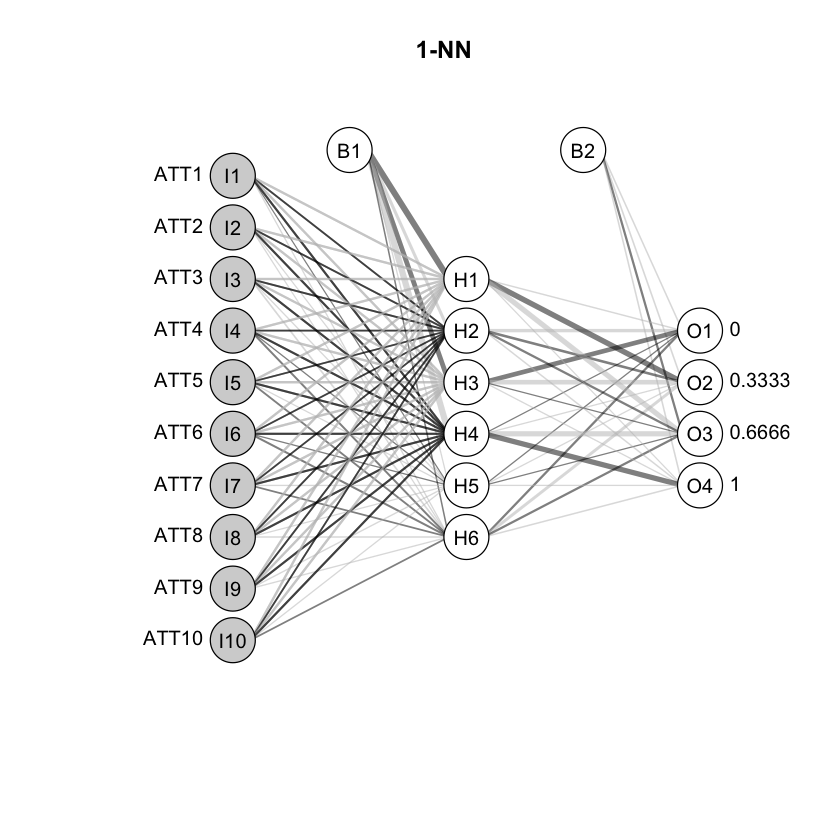

In [137]:
plot.nnet(nn.fit, alpha.val = 0.5, circle.col = list('lightgray', 'white'), bord.col = 'black', main="1-NN")

In [138]:
model.err[9,1] <- '1-NN'
model.err[9,2] <- round(mean(error.nn),3)
print(mean(error.nn))

[1] 0.001333333


# k Nearest Neighbours

In [139]:
error.knn <- seq(1:10)
for(i in 1:10){
    testIndexes <- which(folds==i,arr.ind=TRUE)
    test.data <- actual2[testIndexes, -ncol(actual2)]
    test.labels <- actual2[testIndexes, ncol(actual2)]
    train.data <- actual2[-testIndexes, ]
    
    
    knn.fit <- train.kknn(as.factor(Result) ~ ., data = train.data)
    prediction <- predict(knn.fit, test.data)
    error.knn[i] <- mean(prediction!=test.labels)
}
print(mean(error.knn))

[1] 0.2253333


In [140]:
model.err[10,1] <- 'kNN'
model.err[10,2] <- round(mean(error.knn),3)

# Results

In [69]:
model.err[,2] <- as.numeric(model.err[,2])*100

In [70]:
model.err

Random Forest,22.7
Naive Bayes,21.7
svm,5.9
svmNL,0
ksvm,4.5
qda,3.2
lda,5.7
multinom,0.1
1-NN,0.1
kNN,22.4


In [71]:
model.err <- as.data.frame(model.err)

In [72]:
colnames(model.err) <-c("method",'err')

In [73]:
model.err$err <- as.numeric(as.character(model.err$err))

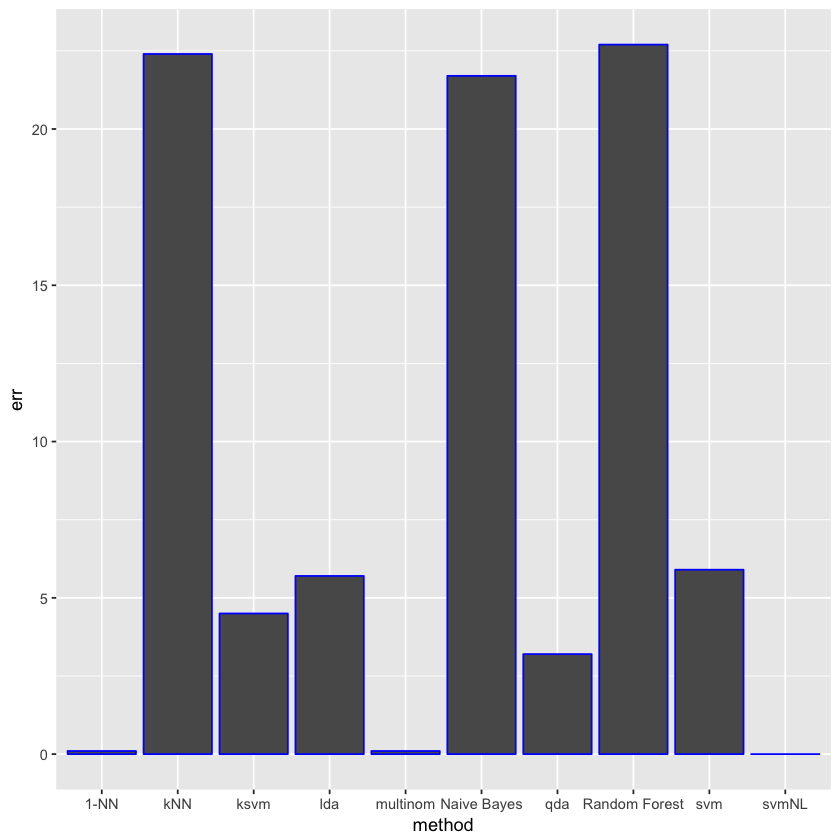

In [74]:
ggplot(data=model.err)+
  geom_bar(aes(x=method, y=err),        
           stat="identity",
           colour="blue", lwd=0.5)

Random Forest, Naive Bayes and kNN will nto be discussed as the error rates for those models are too high. 

LDA and Linear SVM have also not performed as well as their more flexible counterparts implying that the data is not linearly seperable. QDA performs slightly better than LDA due to the nature of the data

Models that perfrom well are.

1. SVM (non-linear)  
2. Multinom Logistic Regression
3. Single Layer NN

They have error rates of <1% and would be good method to try out in application

In [75]:
svm.final <- svm(as.factor(Result) ~ ., data = actual, kernel = "polynomial", cost=100, degree=1, gamma=0.5)

e1047 non-linear SVM both has 0% error in k-fold CV. Although both methods are hard to explain SVM has underlying theory. The reason that SVMs often outperform ANNs in practice is that they deal with the biggest problem with ANNs, SVMs are less prone to overfitting.

Therefore if we only had one choice SVM would be a better one.

In [76]:
multinom.final <- multinom(as.factor(Result) ~ ., data = actual, maxit = 120)

# weights:  48 (33 variable)
initial  value 4158.883083 
iter  10 value 3200.861112
iter  20 value 2310.762283
iter  30 value 1879.822941
iter  40 value 528.894933
iter  50 value 23.301990
iter  60 value 17.718938
iter  70 value 16.150111
iter  80 value 15.116527
iter  90 value 15.011074
iter 100 value 14.857082
iter 110 value 12.105848
iter 120 value 12.087085
final  value 12.087085 
stopped after 120 iterations


In [77]:
nn.fit <- nnet(as.factor(Result) ~ ., data = scaled.data, size = 6 , rang = 0.1,
    decay = 5e-4, maxit = 300)

# weights:  94
initial  value 4268.734943 
iter  10 value 3730.881173
iter  20 value 2631.830390
iter  30 value 1147.834546
iter  40 value 790.263917
iter  50 value 449.702024
iter  60 value 249.762476
iter  70 value 113.181389
iter  80 value 91.795826
iter  90 value 88.736156
iter 100 value 85.422138
iter 110 value 80.241803
iter 120 value 63.413011
iter 130 value 55.722628
iter 140 value 51.208789
iter 150 value 46.888519
iter 160 value 44.429916
iter 170 value 42.958786
iter 180 value 40.807864
iter 190 value 36.870643
iter 200 value 33.692701
iter 210 value 30.592924
iter 220 value 27.918823
iter 230 value 24.558026
iter 240 value 21.054177
iter 250 value 17.520475
iter 260 value 14.825920
iter 270 value 9.641666
iter 280 value 8.353598
iter 290 value 7.585755
iter 300 value 7.069378
final  value 7.069378 
stopped after 300 iterations


# References

1. Support Vector Machines vs Artificial Neural Networks , web: http://www.svms.org/anns.html